In [ ]:
import pandas as pd

import nltk
import string

tokens_blocked = (
    set(nltk.corpus.stopwords.words('english'))
        | set(string.punctuation)
)

tokens = nltk.corpus.genesis.words('english-kjv.txt')

df_tokens = pd.Series(filter(lambda x: x not in tokens_blocked, tokens))
df_token_freqs = df_tokens.value_counts()

df_token_freqs_ = pd.DataFrame({
    'token': df_token_freqs.index,
    'frequency': df_token_freqs.values
})
df_token_freqs_

,token,frequency
0,And,1250
1,unto,590
2,I,484
3,said,476
4,thou,272
...,...,...
2656,half,1
2657,golden,1
2658,wit,1
2659,wondering,1


In [ ]:
import matplotlib.pyplot as plt

from tagcloud import (
    TagCloud,
    DescendingFrequencyTable,
    FrequencyData,
    graphics
)
from tagcloud.backends.backend_pil import CanvasPIL

In [ ]:
wc = TagCloud(canvas_backend=CanvasPIL)

In [ ]:
#%%capture

# TODO normalize

import cProfile
with cProfile.Profile() as pr:
    c, layout = wc.draw(
        frequency_table=DescendingFrequencyTable.from_dataframe(df_token_freqs_).head(10),
        text_props=dict(
            #size_max=200,
            #rotation_range=(0, 0),
            #rotation_step=90,
            rotation_prob=.1
        ),
        #canvas_props=dict(size=graphics.Dimension(200, 400))
        canvas_props=dict(size=graphics.Dimension(768, 1024))
    )
    
    pr.print_stats(sort='time')


progress And 1.0
progress unto 0.472
progress And 1.0
progress unto 0.472
progress I 0.3872
progress said 0.3808
progress thou 0.2176
progress thy 0.2136
progress thee 0.2056
progress shall 0.2024
progress God 0.1848
progress father 0.1584
         145386 function calls (141699 primitive calls) in 4.556 seconds

   Ordered by: internal time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
     1206    1.447    0.001    1.447    0.001 {method 'render' of 'Font' objects}
     1206    1.002    0.001    1.006    0.001 graphics.py:173(_area_matrix)
     1206    0.802    0.001    0.802    0.001 {method 'getsize' of 'Font' objects}
     1206    0.562    0.000    0.562    0.000 {method 'nonzero' of 'numpy.ndarray' objects}
     1206    0.192    0.000    1.825    0.002 graphics.py:195(_find)
     1206    0.127    0.000    0.127    0.000 {built-in method PIL._imagingft.getfont}
       28    0.029    0.001    0.029    0.001 {method 'cumsum' of 'numpy.ndarray' objects}
    

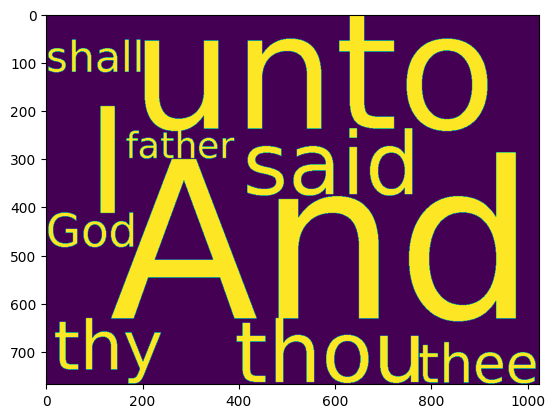

In [ ]:
_ = plt.imshow(c.data_bool)

In [ ]:
#%%capture

#!pip install --force-reinstall wordcloud

import wordcloud
import nltk

t = nltk.corpus.genesis.open('english-kjv.txt').read()

import cProfile
with cProfile.Profile() as pr:
    im = wordcloud.WordCloud(
        background_color=None, 
        mode='RGBA', 
        prefer_horizontal=1.,
        width=1024, height=768
    ).generate(t).to_image()
    pr.print_stats(sort='time')

progress unto 1.0
try init 768 None
elapsed 0:00:00.161238
progress son 0.7758620689655172
try init 377 None
elapsed 0:00:00.016553
layout len 2
progress unto 1.0
try init 389 None
elapsed 0:00:00.000880
progress son 0.7758620689655172
try init 345 None
elapsed 0:00:00.052253
progress said 0.6666666666666666
try init 273 None
elapsed 0:00:00.038960
progress land 0.5287356321839081
try init 212 None
elapsed 0:00:00.024011
progress thee 0.514367816091954
try init 193 None
elapsed 0:00:00.058775
progress Jacob 0.514367816091954
try init 146 None
elapsed 0:00:00.027855
progress said unto 0.514367816091954
try init 122 None
elapsed 0:00:00.008579
progress thy 0.5086206896551724
try init 114 None
elapsed 0:00:00.010674
progress father 0.4885057471264368
try init 104 None
elapsed 0:00:00.001812
progress came 0.4827586206896552
try init 103 None
elapsed 0:00:00.007794
progress LORD 0.45977011494252873
try init 96 None
elapsed 0:00:00.003983
progress Joseph 0.4511494252873563
try init 93 None
e

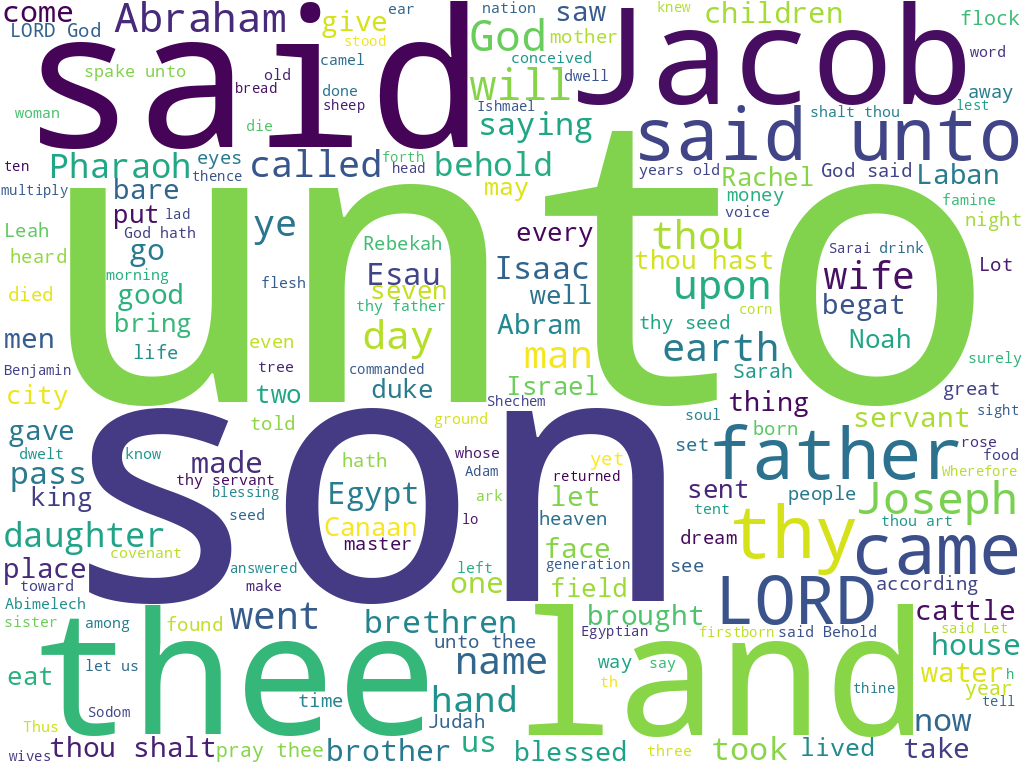

: 

In [ ]:
im